In [70]:
import pandas as pd
# import json 
import ast 
import matplotlib.pyplot as plt
import numpy as np

Matplotlib created a temporary config/cache directory at /tmp/matplotlib-xzotl5w5 because the default path (/home/karen/.cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


In [55]:
data = pd.read_csv('poseout.txt', sep="\t", header=None)
data.columns = ["time", "kpoints", "count", "fps"]

In [33]:
data.head()

,time,kpoints,count,fps
0,1.603209e+09,"[(0, None, None), (1, None, None), (2, None, N...",1,16.305149
1,1.603209e+09,"[(0, None, None), (1, None, None), (2, None, N...",2,46.687935
2,1.603209e+09,"[(0, 0.37119027972221375, 0.5603485107421875),...",1,23.833710
3,1.603209e+09,"[(0, 0.3741444945335388, 0.6049302220344543), ...",2,40.583493
4,1.603209e+09,"[(0, 0.37023040652275085, 0.6054080724716187),...",3,36.158105


Note: my code here sucks because I don't remember how to write Python --- definitely need to be optimized.

To do:

* [ ] Consider both x and y coordinates of each keypoint
* [ ] Figure out how to use the right keypoints given a certain video/pose. I used a front-facing video but the right keypoints are probably different for a different angle and for a top-down view of a baby
* [ ] Might want to look at the distance between 2 keypoints, like shoulder-to-ear or shoulder-to-hip

In [ ]:
data.kpoints = data.kpoints.apply(lambda x: ast.literal_eval(x.strip("()")))

In [90]:
rshoulder = []

for i in range(len(data.kpoints)):
    rshoulder.append(data.kpoints[i][6][2])

In [78]:
lshoulder = []

for i in range(len(data.kpoints)):
    lshoulder.append(data.kpoints[i][5][2])

In [100]:
r_ear = []

for i in range(len(data.kpoints)):
    r_ear.append(data.kpoints[i][4][2])

In [117]:
# data.time.values

Text(0.5, 1.0, 'L shoulder')

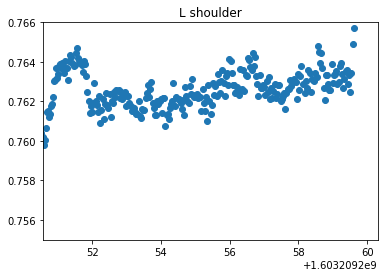

In [119]:
plt.scatter(data.time.values, lshoulder)
plt.xlim(data.time.values[10], data.time.values[300])
plt.ylim(.755, .766)
plt.title("L shoulder")

Text(0.5, 1.0, 'R shoulder')

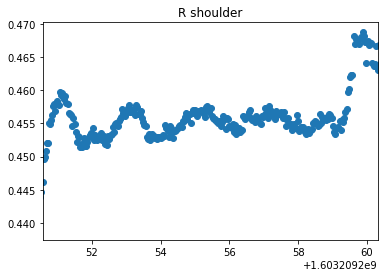

In [113]:
plt.scatter(data.time.values, rshoulder)
plt.xlim(data.time.values[10], data.time.values[300])
plt.title("R shoulder")
# plt.ylim(.452, .4555)

Text(0.5, 1.0, 'R ear')

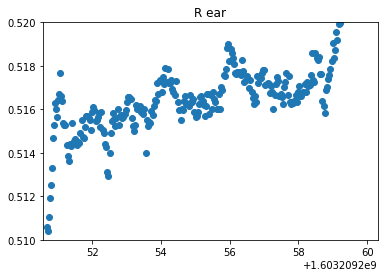

In [114]:
plt.scatter(data.time.values, r_ear)
plt.xlim(data.time.values[10], data.time.values[300])
plt.ylim(.51, .52)
plt.title("R ear")